<a href="https://colab.research.google.com/github/tayor123/personal-/blob/main/IRIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)




In [23]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [26]:
print(iris.info())
iris.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


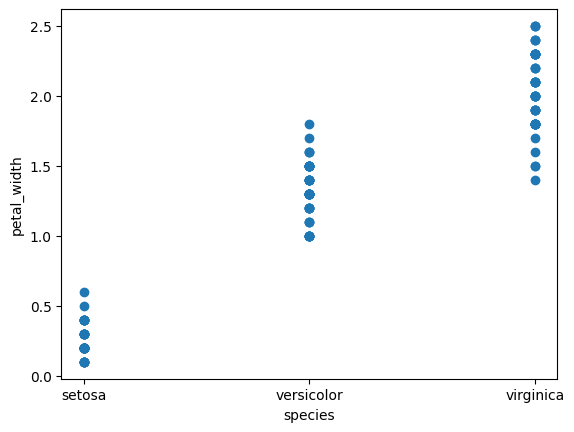

In [27]:
plt.scatter(iris['species'], iris['petal_width'])
plt.xlabel('species')
plt.ylabel('petal_width')
plt.show()

In [28]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [29]:
X= iris[["petal_width", "petal_length", "sepal_width", "sepal_length"]]
y= iris["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)



In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ✅ Fit only on training set
X_test_scaled = scaler.transform(X_test)  # ✅ Transform test set


In [31]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)  # y_train can be 'setosa', etc.
y_pred = model.predict(X_test_scaled)  # outputs predicted species

In [32]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.92
Confusion Matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]
Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.84      0.94      0.89        17
   virginica       0.93      0.82      0.88        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [33]:
%%writefile app.py
import streamlit as st
import joblib

# Load model
model = joblib.load("crop_model.pkl")
scaler = joblib.load("crop_scaler.pkl")

st.title("Crop Variety Predictor")

# Inputs from farmer
leaf_length = st.number_input("Leaf length (cm)")
leaf_width = st.number_input("Leaf width (cm)")
stem_thickness = st.number_input("Stem thickness (cm)")
plant_height = st.number_input("Plant height (cm)")

if st.button("Predict Crop Variety"):
    X_new = np.array([[leaf_length, leaf_width, stem_thickness, plant_height]])
    X_new_scaled = scaler.transform(X_new)
    prediction = model.predict(X_new_scaled)
    probability = model.predict_proba(X_new_scaled)
    st.write(f"Predicted Crop Variety: {prediction[0]}")
    st.write(f"Confidence: {np.max(probability)*100:.2f}%")


Overwriting app.py


In [40]:
!pip install pyngrok
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.1 MB/s eta 0:00:00


In [35]:

from pyngrok import ngrok

# Replace YOUR_AUTHTOKEN_HERE with the token you got from ngrok
ngrok.set_auth_token("38vypG7oknwGtdiQrYXRD3tNLLd_6AGwqHYTdmUmEbdi8JmB9")


In [36]:


# Open a public URL to access your Streamlit app
public_url = ngrok.connect("http://localhost:8501")
print(public_url)


NgrokTunnel: "https://unconsummated-shalon-unparaded.ngrok-free.dev" -> "http://localhost:8501"


In [37]:
!streamlit run app.py &>/content/logs.txt &


In [38]:
!streamlit run app.py --server.port 8501 &>/content/logs.txt &


In [39]:
!lsof -i :8501


In [41]:
%%writefile app.py
import streamlit as st

st.title("Hello from Streamlit on Colab 🚀")
st.write("This app is running via ngrok!")


Overwriting app.py


In [42]:
!streamlit run app.py --server.port 8501 --server.headless true &>/content/logs.txt &


In [43]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://unconsummated-shalon-unparaded.ngrok-free.dev" -> "http://localhost:8501"


In [44]:
!curl http://localhost:8501


<!--
 Copyright (c) Streamlit Inc. (2018-2022) Snowflake Inc. (2022-2026)

 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.
-->

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta
      name="viewport"
      content="width=device-width, initial-scale=1, shrink-to-fit=no"
    />
    <link rel="shortcut icon" href="./favicon.png" />
    <link
      rel="preload"
      href="./static/media/SourceSansVF-Upright.ttf.BsWL4Kly.woff2"
      as="font"
      type="font/woff2"
      crossorig

In [45]:
ngrok.kill()


In [46]:
!streamlit run app.py --server.port 8501 --server.headless true &>/content/logs.txt &


In [47]:
from pyngrok import ngrok
ngrok.connect(8501)


<NgrokTunnel: "https://unconsummated-shalon-unparaded.ngrok-free.dev" -> "http://localhost:8501">

In [49]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [50]:
import streamlit as st
import joblib

model = joblib.load("model.pkl")

st.title("Prediction App")

count = st.number_input("Enter count", min_value=0)

if st.button("Predict"):
    prediction = model.predict([[count]])
    st.success(f"Prediction: {prediction[0]}")



2026-02-02 16:43:00.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.506 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-02 16:43:00.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 16:43:00.512 Thread 'MainThread': mi

In [51]:
!ps aux | grep streamlit


root        5313  0.0  0.5 387048 76524 ?        Sl   16:07   0:02 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true
root       14974  0.0  0.0   7372  3532 ?        S    16:48   0:00 /bin/bash -c ps aux | grep streamlit
root       14976  0.0  0.0   6480  2532 ?        S    16:48   0:00 grep streamlit
